In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlibe inline 

UsageError: Line magic function `%matplotlibe` not found.


In [9]:
import pandas_datareader
import datetime

In [6]:
import pandas_datareader.data as web  

In [10]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2017,1,1)

In [14]:
tesla = web.DataReader('TSLA','yahoo',start, end)

In [15]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450


In [16]:
ford = web.DataReader('F','yahoo',start,end)

In [17]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.544740
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.659981
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.856563
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.937905
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.998916


In [19]:
gm = web.DataReader('GM','yahoo',start,end)
gm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.269407
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.346703
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.135054
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.714725
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.652889


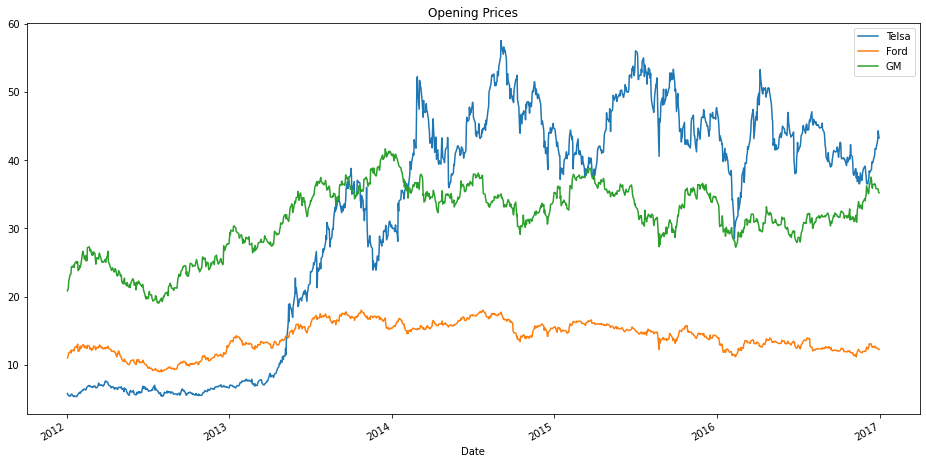

In [24]:
tesla['Open'].plot(label='Telsa', figsize=(16,8), title = 'Opening Prices')
ford['Open'].plot(label='Ford')
gm['Open'].plot(label='GM')
plt.legend()
plt.show()

# Volume of Stock

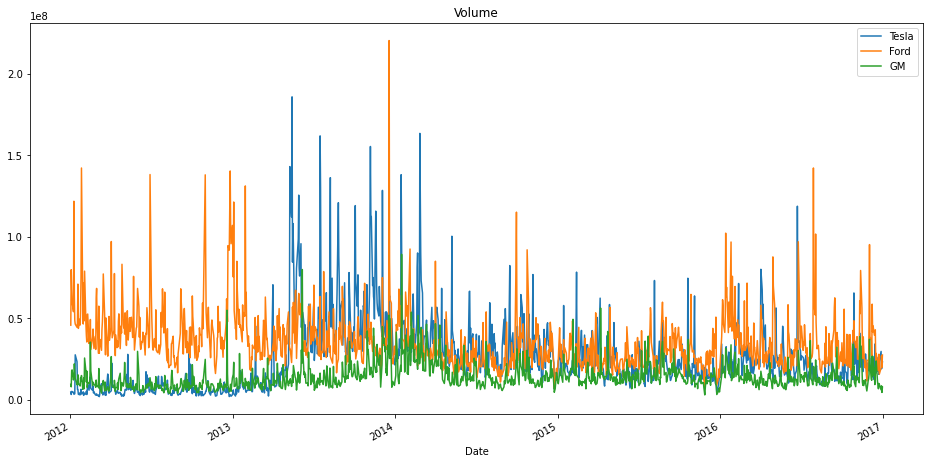

In [25]:
tesla['Volume'].plot(label='Tesla', figsize=(16,8), title= 'Volume')
ford['Volume'].plot(label='Ford')
gm['Volume'].plot(label= 'GM')
plt.legend()
plt.show()

In [28]:
ford['Volume'].argmax()

493

# total Traded People

In [30]:
tesla['total traded'] = tesla['Open'] * tesla['Volume'] 
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,total traded
Date,,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616,2.685921e+07
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542,1.777512e+07
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424,2.791268e+07
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382,2.682736e+07
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450,2.421900e+07


In [31]:
ford['total traded'] = ford['Open'] * ford['Volume']
gm['total traded']= gm['Open'] * gm['Volume']


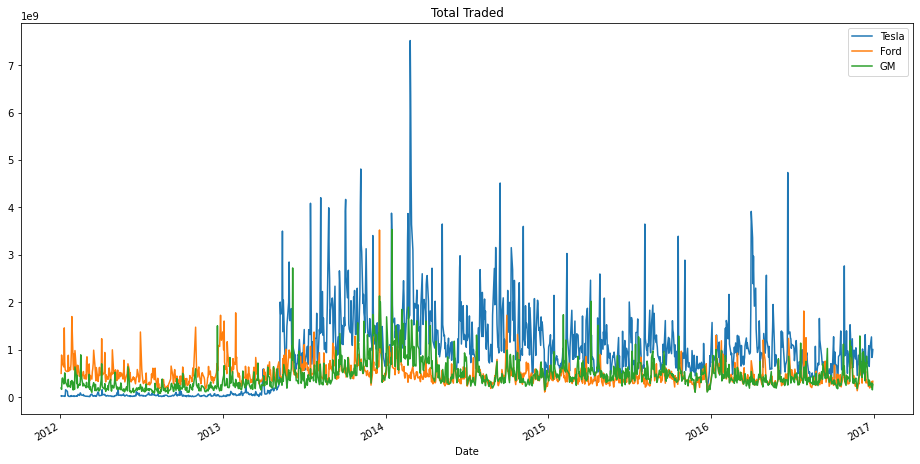

In [32]:
tesla['total traded'].plot(label='Tesla', figsize=(16,8), title = 'Total Traded')
ford['total traded'].plot(label = 'Ford')
gm['total traded'].plot(label = 'GM')
plt.legend()
plt.show()

# lest Plot some Moving Averages

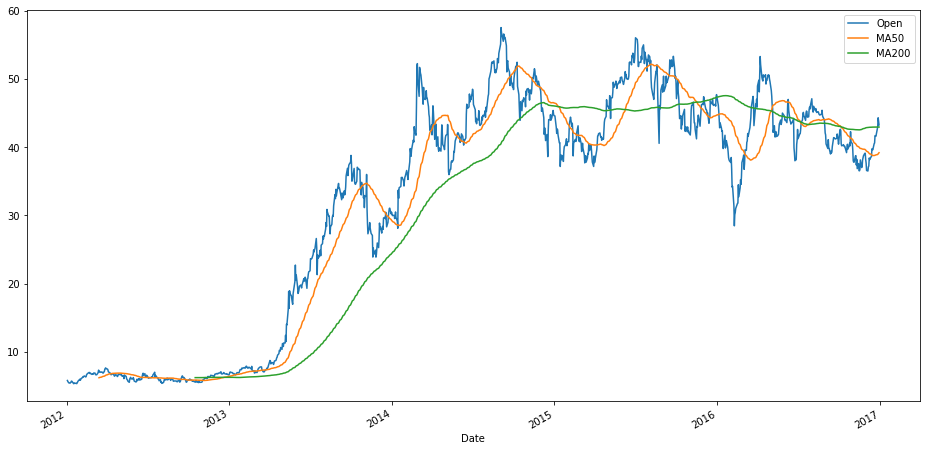

In [35]:
tesla['MA50'] = tesla['Open'].rolling(50).mean()
tesla['MA200'] = tesla['Open'].rolling(200).mean()
tesla[['Open', 'MA50', 'MA200']].plot(figsize=(16,8))
plt.legend()

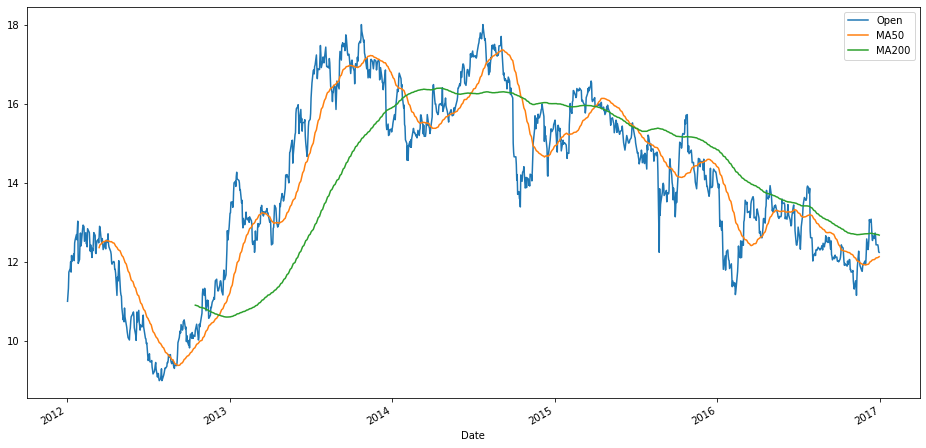

In [36]:
ford['MA50'] = ford['Open'].rolling(50).mean()
ford['MA200'] = ford['Open'].rolling(200).mean()
ford[['Open', 'MA50', 'MA200']].plot(figsize=(16,8))
plt.legend()

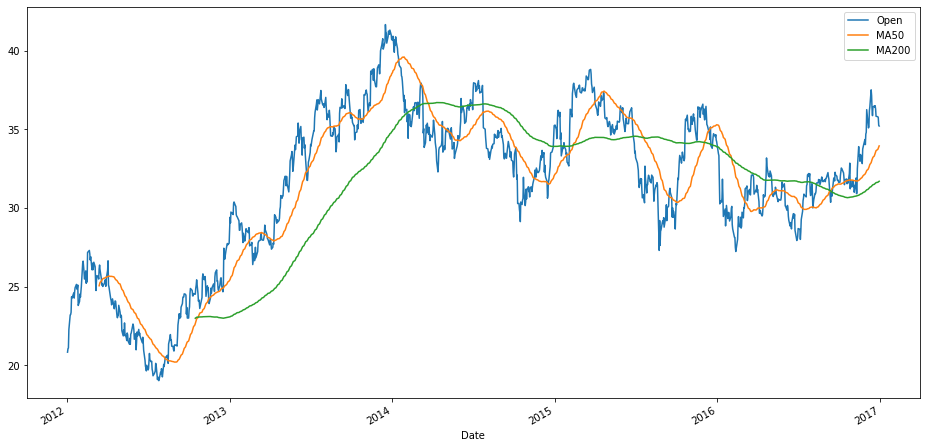

In [37]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open', 'MA50', 'MA200']].plot(figsize=(16,8))
plt.legend()

In [39]:
car_comp = pd.concat([tesla['Open'],ford['Open'],gm['Open']],axis = 1)
car_comp.columns = ['tesla Open', 'ford Open', 'gm Open']
car_comp.head()

,tesla Open,ford Open,gm Open
Date,,,
2012-01-03,5.788,11.00,20.830000
2012-01-04,5.642,11.15,21.049999
2012-01-05,5.552,11.33,21.100000
2012-01-06,5.440,11.74,22.260000
2012-01-09,5.400,11.83,23.200001


In [41]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='tesla Open', ylabel='tesla Open'>,
        <AxesSubplot:xlabel='ford Open', ylabel='tesla Open'>,
        <AxesSubplot:xlabel='gm Open', ylabel='tesla Open'>],
       [<AxesSubplot:xlabel='tesla Open', ylabel='ford Open'>,
        <AxesSubplot:xlabel='ford Open', ylabel='ford Open'>,
        <AxesSubplot:xlabel='gm Open', ylabel='ford Open'>],
       [<AxesSubplot:xlabel='tesla Open', ylabel='gm Open'>,
        <AxesSubplot:xlabel='ford Open', ylabel='gm Open'>,
        <AxesSubplot:xlabel='gm Open', ylabel='gm Open'>]], dtype=object)

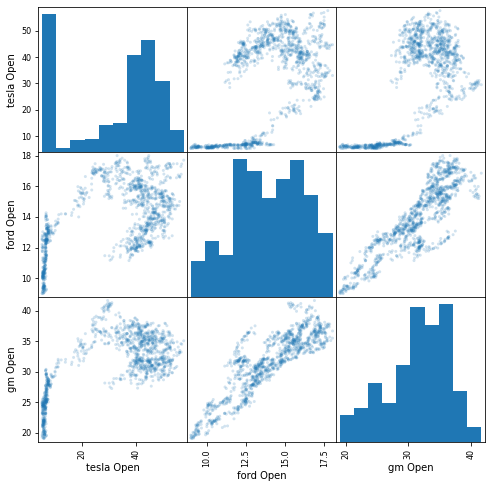

In [43]:
scatter_matrix(car_comp, figsize=(8,8), alpha = 0.2)

In [48]:
# from matplotlib.dates import DateFormatter, WeekdayLocator,\
#     DayLocator, MONDAY
# from matplotlib.finance import quotes_historical_yahoo_ohlc, candlestick_ohlc

# Basic Financial Anlysis

In [49]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close,total traded,MA50,MA200
Date,,,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.544740,5.028089e+08,NaN,NaN
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.659981,8.889359e+08,NaN,NaN
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.856563,7.690521e+08,NaN,NaN
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.937905,7.025298e+08,NaN,NaN
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.998916,6.386011e+08,NaN,NaN


In [51]:
ford.loc['2012-01-06','Close']

11.710000038146973

In [52]:
tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1)) - 1

In [53]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,total traded,MA50,MA200,returns
Date,,,,,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616,2.685921e+07,NaN,NaN,NaN
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542,1.777512e+07,NaN,NaN,-0.013177
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424,2.791268e+07,NaN,NaN,-0.021292
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382,2.682736e+07,NaN,NaN,-0.007743
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450,2.421900e+07,NaN,NaN,0.012635


In [64]:
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)

<AxesSubplot:>

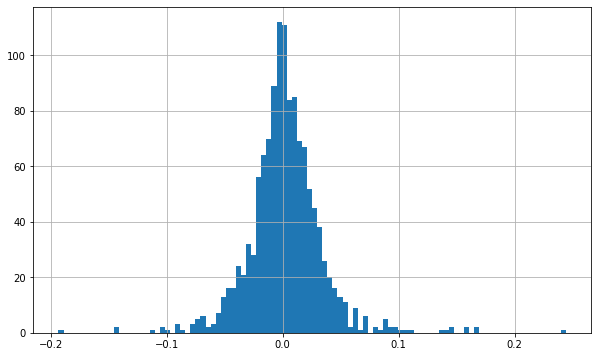

In [62]:
tesla['returns'].hist(bins = 100, figsize=(10,6))                   

<AxesSubplot:>

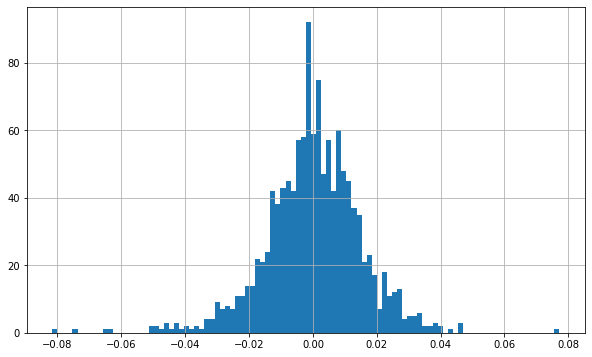

In [65]:
ford['returns'].hist(bins = 100, figsize= (10,6))

<AxesSubplot:>

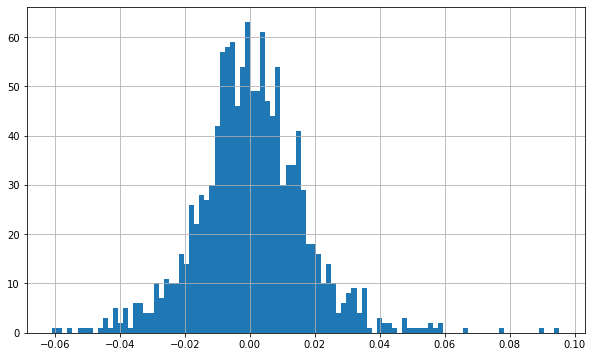

In [66]:
gm['returns'].hist(bins = 100, figsize=(10,6))

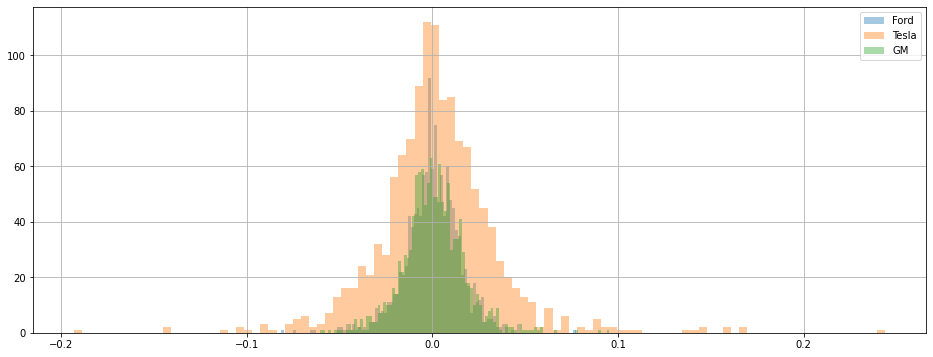

In [68]:
ford['returns'].hist(bins =100,label='Ford' ,figsize=(16,6), alpha =0.4)
tesla['returns'].hist(bins= 100,label= 'Tesla', figsize= (16, 6),alpha =0.4)
gm['returns'].hist(bins = 100, label= 'GM', figsize= (16, 6),alpha =0.4)
plt.legend()

<AxesSubplot:>

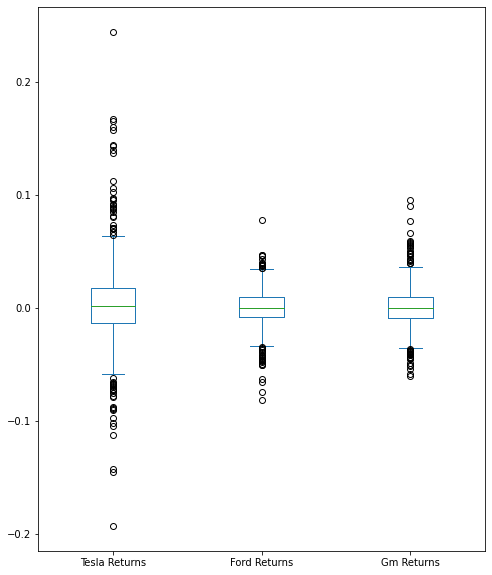

In [72]:
box_df = pd.concat([tesla['returns'],ford['returns'],gm['returns']],axis = 1)
box_df.columns = ['Tesla Returns', 'Ford Returns', 'Gm Returns']
box_df.plot(kind= 'box', figsize=(8,10))

array([[<AxesSubplot:xlabel='Tesla Returns', ylabel='Tesla Returns'>,
        <AxesSubplot:xlabel='Ford Returns', ylabel='Tesla Returns'>,
        <AxesSubplot:xlabel='Gm Returns', ylabel='Tesla Returns'>],
       [<AxesSubplot:xlabel='Tesla Returns', ylabel='Ford Returns'>,
        <AxesSubplot:xlabel='Ford Returns', ylabel='Ford Returns'>,
        <AxesSubplot:xlabel='Gm Returns', ylabel='Ford Returns'>],
       [<AxesSubplot:xlabel='Tesla Returns', ylabel='Gm Returns'>,
        <AxesSubplot:xlabel='Ford Returns', ylabel='Gm Returns'>,
        <AxesSubplot:xlabel='Gm Returns', ylabel='Gm Returns'>]],
      dtype=object)

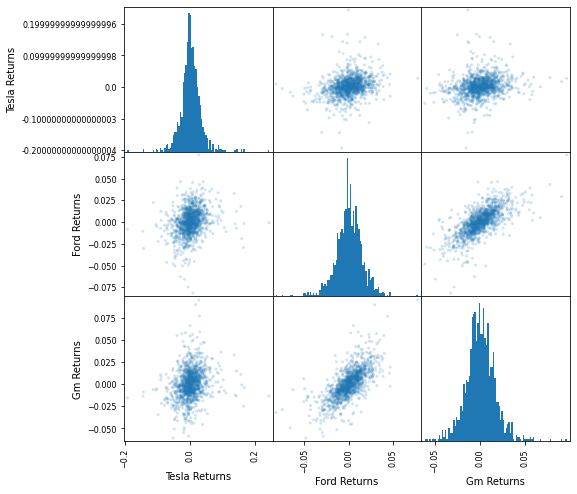

In [74]:
scatter_matrix(box_df ,figsize=(8,8), alpha = 0.2, hist_kwds = {'bins':100})

In [76]:
# Cumulative Daily returns
tesla['cumulative'] = (1 + tesla['returns']).cumprod()
ford['cumulative'] = (1 + ford['returns']).cumprod()
gm['cumulative'] = (1 + gm['returns']).cumprod()

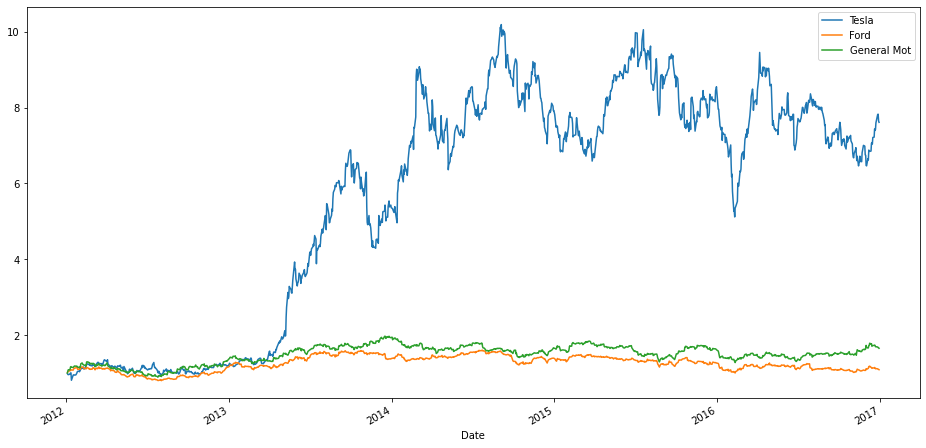

In [78]:
tesla['cumulative'].plot(label='Tesla',figsize=(16,8))
ford['cumulative'].plot(label= 'Ford')
gm['cumulative'].plot(label='General Mot')
plt.legend()

In [ ]:
#  thank You